In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.graph_objs import *
from plotly.offline import iplot

In [2]:
df_stocks = pd.read_csv("Tech_stock_prices.csv")

In [3]:
df = df_stocks[['ticker','close','date']][:100000].copy()

In [4]:
df['date'] = pd.to_datetime(df.date)
df = df[df['date'] > '2010-01-01']
df = df.sort_values(by='date')
df = df.reset_index(drop=True)
df.head()

,ticker,close,date
0,GOOGL,313.68869,2010-01-04
1,DOX,28.74000,2010-01-04
2,ADBE,37.09000,2010-01-04
3,AMKR,7.38000,2010-01-04
4,AMCN,8.20000,2010-01-04


In [5]:
uniqueTickers = df.ticker.unique()
uniquedate = df.date.unique()
newDf = pd.DataFrame(index=uniquedate, columns=uniqueTickers)
newDf = newDf.fillna(np.nan) # with 0s rather than NaNs
len(uniqueTickers)

27

In [6]:
for i in range(0, len(df)):
    date = df.loc[i, 'date']
    close = df.loc[i, 'close']
    ticker = df.loc[i, 'ticker']
    newDf.loc[date,ticker] = close
    
print(newDf.isna().sum())
newDf = newDf.dropna(axis=1)

GOOGL       0
DOX         0
ADBE        0
AMKR        0
AMCN        0
AGYS        0
AABA        0
ACIW        0
ALLT        0
AMD         1
ACXM        0
MDRX        0
JOBS        0
ATVI        0
GOOG        0
AOSL       80
VNET      328
AMBA      699
TWOU     1065
AMRH     1779
ALRM     1379
IOTS     1464
ACIA     1610
AIRG     1681
ACMR     1973
ALTR     1972
AGMH     2087
dtype: int64


In [7]:
def normalize(df):
    tickers = list(df.columns) 
    
    for i in range(0, len(tickers)):
        colMax = df[tickers[i]].max()
        df[tickers[i]]=df[tickers[i]]/colMax

percent_change_df = (newDf - newDf.shift())/newDf.shift()
normalize(percent_change_df)
percent_change_df[np.isnan(percent_change_df)] = 0

percent_change_df.head()

,GOOGL,DOX,ADBE,AMKR,AMCN,AGYS,AABA,ACIW,ALLT,ACXM,MDRX,JOBS,ATVI,GOOG
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,-0.027085,0.000000,0.128688,-0.038211,0.065821,0.012100,0.073507,-0.155959,0.028695,-0.052007,-0.119758,0.109612,0.009376,-0.027433
2010-01-06,-0.155050,-0.167823,-0.016604,-0.055110,0.033404,-0.130013,-0.033670,-0.189626,-0.014279,0.024231,-0.068035,0.037526,-0.028077,-0.157040
2010-01-07,-0.143185,-0.316288,-0.151834,0.111749,-0.035680,0.104483,-0.264674,-0.088147,0.014313,0.048250,-0.002756,0.148962,-0.127023,-0.145022
2010-01-08,0.081995,0.306195,-0.042422,-0.043493,0.030657,0.036601,0.000000,0.027204,0.000000,-0.035875,0.033089,0.010327,-0.043381,0.083047


In [8]:
saved_df = newDf.copy()
newDf = percent_change_df

# Correlation and Vovarience matrix

In [9]:
mean_stocks = newDf.mean(axis=0)
std_stocks = newDf.std(ddof=1, axis=0)
newDf_pca = (newDf - mean_stocks)/std_stocks
 
cov_mat = np.cov(newDf_pca.values.T)  
corr_mat = np.corrcoef(newDf_pca.values.T)

# Calculate the stocks with that are most correlated

In [10]:
corr_rank = corr_mat.sum(axis=0)
tickers = list(newDf.columns)

most_corr_df = pd.DataFrame(index=range(0, len(tickers)))
most_corr_df['tcikers'] = tickers
most_corr_df['corr'] = corr_rank
most_corr_df = most_corr_df.sort_values(by=['corr'],ascending=False)
most_corr_df = most_corr_df.reset_index(drop=True)

most_corr_df.head()

,tcikers,corr
0,GOOG,5.924576
1,GOOGL,5.924453
2,ADBE,5.551565
3,ACIW,5.529869
4,DOX,5.388999


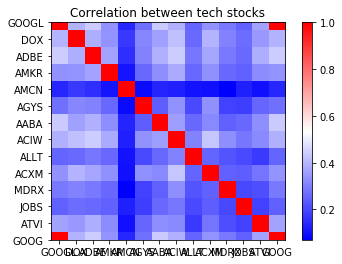

In [11]:
plt.imshow(corr_mat, cmap="bwr")
cb = plt.colorbar()
plt.yticks(np.array(range(0, len(tickers))), tickers)
plt.xticks(np.array(range(0, len(tickers))), tickers)
plt.title("Correlation between tech stocks")
plt.show()

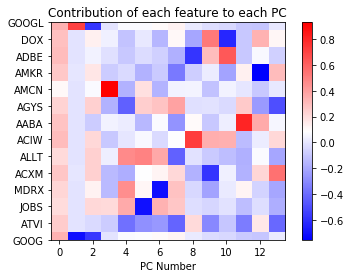

In [12]:
vals, vecs = np.linalg.eig(cov_mat)  
 
ax = plt.figure().gca()
plt.imshow(vecs, cmap="bwr")
cb = plt.colorbar()
plt.yticks(np.array(range(0, len(tickers))), tickers)
plt.xlabel("PC Number")
plt.title("Contribution of each feature to each PC")
plt.show()

Text(0.5, 1.0, 'PCA components total varience')

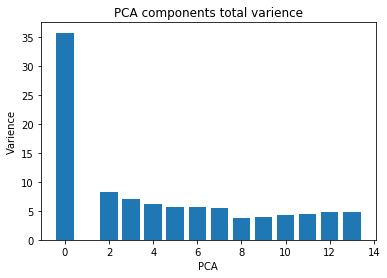

In [13]:
sumOfEigVals = sum(vals)
PCA_varience = (vals/sumOfEigVals)*100
xLables = np.array(range(0, len(vals)))
plt.bar(xLables, PCA_varience)
plt.ylabel('Varience')
plt.xlabel('PCA')
plt.title('PCA components total varience')

In [16]:
vecs[:2].shape

(2, 14)

In [60]:
Principal_comp = vecs.dot(newDf.T)
pd.DataFrame(Principal_comp.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.094393,0.004073,-0.103973,0.083213,-0.056427,0.008977,0.121228,-0.050767,0.162732,-0.017216,-0.022648,0.006427,0.020044,-0.093551
2,-0.197979,-0.044448,-0.035047,0.043423,-0.110002,-0.065084,0.027352,-0.134115,0.011286,-0.215352,-0.027033,0.016485,0.120473,0.039113
3,-0.222811,-0.073449,-0.025057,0.035838,0.146561,-0.014120,0.027222,-0.106379,-0.098218,-0.291696,0.134103,-0.231556,0.024169,0.224459
4,0.280936,-0.029758,0.015846,0.054021,-0.020125,-0.006730,0.014332,0.038737,0.003880,0.079393,0.039572,-0.022747,-0.044566,-0.151435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,-0.094036,0.012313,-0.022963,0.008006,-0.041438,0.026844,-0.027143,0.063994,0.115133,0.049211,-0.009536,0.171909,-0.139794,0.046286
2173,-0.118783,0.015938,0.042268,-0.074459,0.032366,0.177868,0.077702,0.025598,-0.059691,0.007094,-0.164510,-0.019873,-0.040714,0.021940
2174,-0.044728,0.094038,0.127714,-0.112552,-0.025594,0.075697,-0.034589,0.038931,-0.046323,0.130966,-0.016860,-0.000972,-0.022814,-0.096065
2175,-0.036772,0.090655,-0.021625,0.055022,0.022691,-0.027781,-0.078438,-0.024429,-0.078372,0.006470,0.197664,-0.143515,0.112695,-0.059401


In [85]:
pred_google = newDf['GOOG'].values.T*Principal_comp
pred_google = pd.DataFrame(pred_google.T)

In [90]:
pred_google[0].shape

(2177,)

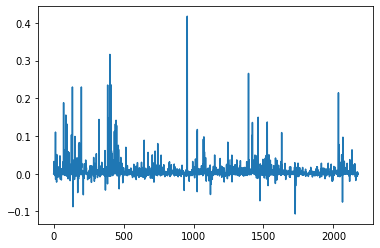

In [92]:
plt.plot(range(0, len(pred_google[0])), pred_google[0])

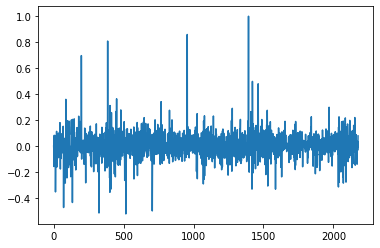

In [95]:
plt.plot(range(0, len(pred_google[0])), newDf['GOOG'])